In [4]:
import sys
import os
import math
import importlib
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import random
%matplotlib inline

In [36]:
def simulate(initialRatio):
    rand = random.Random(1337)
    nprand = np.random.RandomState(1337)
    populationSize = 5000 # small town 
    # model # of children as Poisson:
    # 2.5 avg children, and for Poisson, mean=variance
    # note that the 2.5 number is for present day - that's a conservative choice for it
    # since in past it's much higher:
    # https://ourworldindata.org/fertility-rate#the-number-of-children-per-woman-over-the-very-long-run
    numChildrenMeanVariance = 2.5
    # initialize the initial generation
    initialSeeds = rand.sample(range(populationSize), int(populationSize * initialRatio))
    population = [False]*populationSize    
    for i in initialSeeds:
        population[i] = True
    
    result = [(populationSize, len(initialSeeds))]
        
    # start simulating
    generations = 10
    for generation in range(generations):
        # shuffle the array
        newpopulation = []
        rand.shuffle(population)
        popWithTrait = 0
        # for each (randomly shuffled) pair:
        endval = len(population) & ~1
        for i in range(0, endval, 2):
            # generate number of children
            # if any parent has it, child has it
            hasIt = population[i] or population[i+1]
            numChildren = int(nprand.poisson(numChildrenMeanVariance))
            newpopulation = newpopulation + [hasIt]*numChildren
            if hasIt:
                popWithTrait += numChildren
        print(len(newpopulation), popWithTrait)
        result.append((len(newpopulation), popWithTrait))
        population = newpopulation
    return result

In [37]:
ratios = [0.01, 0.05, 0.10, 0.15, 0.20]
simresults = []
for ratio in ratios:
    print("starting", ratio)
    simresults.append(simulate(ratio))

starting 0.01
6274 122
7931 309
9802 762
12308 1893
15391 4408
19233 9394
24130 17844
30183 28139
37865 37670
47289 47289
starting 0.05
6274 641
7931 1511
9802 3410
12308 7127
15391 12619
19233 18552
24130 24091
30183 30183
37865 37865
47289 47289
starting 0.1
6274 1193
7931 2673
9802 5470
12308 9924
15391 14831
19233 19214
24130 24130
30183 30183
37865 37865
47289 47289
starting 0.15
6274 1768
7931 3907
9802 7301
12308 11511
15391 15294
19233 19233
24130 24130
30183 30183
37865 37865
47289 47289
starting 0.2
6274 2247
7931 4629
9802 8152
12308 11904
15391 15380
19233 19233
24130 24130
30183 30183
37865 37865
47289 47289


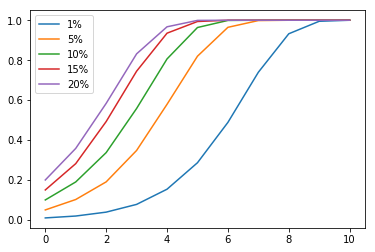

In [42]:
for i in range(len(ratios)):
    simresult = simresults[i]
    ratio = [a[1]/a[0] for a in simresult]
    plt.plot(list(range(len(simresult))), ratio, label=str(int(ratios[i]*100)) + "%")
plt.legend()

In [ ]:
simulate(0.10)